# IMPORT



In [1]:
import pandas as pd
import numpy as np


In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  f1_score, accuracy_score
import matplotlib.pyplot as plt

In [3]:
import random
import nltk


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, accuracy_score



# CARREGAR O DATASET


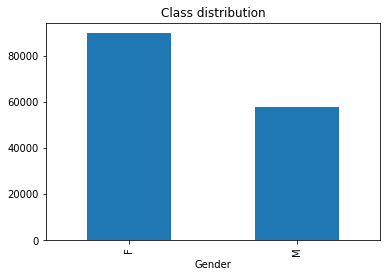

In [5]:
dataset = pd.read_csv('name_gender_dataset.csv')

dataset.pivot_table(index='Gender', aggfunc='size').plot(kind='bar', title = 'Class distribution')


# RANDOM OVERSAMPLING


In [6]:
def oversampler(dataset):
    classes = dataset.Gender.value_counts().to_dict()
    maior = max(classes.values())
    classes_lista = []
    for key in classes:
        classes_lista.append(dataset[dataset['Gender'] == key]) 
    classes_exemplo = []
    for i in range(1,len(classes_lista)):
        classes_exemplo.append(classes_lista[i].sample(maior, replace=True))
    dataset_prov = pd.concat(classes_exemplo)
    final_dataset = pd.concat([dataset_prov,classes_lista[0]], axis=0)
    final_dataset = final_dataset.reset_index(drop=True)
    return final_dataset

In [7]:
dataset = oversampler(dataset)

In [8]:
print(dataset)

             Name Gender  Count   Probability
0            Isau      M     15  4.105110e-08
1           Ronen      M    726  1.986870e-06
2       Enemencio      M     10  2.736740e-08
3           Dysan      M      5  1.368370e-08
4        Kennieth      M    424  1.160380e-06
...           ...    ...    ...           ...
179493      Zyika      F      1  2.736740e-09
179494   Zymeliah      F      1  2.736740e-09
179495     Zyrije      F      1  2.736740e-09
179496    Zyrinah      F      1  2.736740e-09
179497       Zyta      F      1  2.736740e-09

[179498 rows x 4 columns]


In [9]:
dataset.head()

Name Gender  Count   Probability
0       Isau      M     15  4.105110e-08
1      Ronen      M    726  1.986870e-06
2  Enemencio      M     10  2.736740e-08
3      Dysan      M      5  1.368370e-08
4   Kennieth      M    424  1.160380e-06

In [10]:
dataset.dtypes

Name            object
Gender          object
Count            int64
Probability    float64
dtype: object

In [11]:
M_data = dataset[dataset.Gender == 'M']
F_data = dataset[dataset.Gender == 'F']

In [12]:
print(M_data)
print(F_data)

            Name Gender  Count   Probability
0           Isau      M     15  4.105110e-08
1          Ronen      M    726  1.986870e-06
2      Enemencio      M     10  2.736740e-08
3          Dysan      M      5  1.368370e-08
4       Kennieth      M    424  1.160380e-06
...          ...    ...    ...           ...
89744      Elyes      M     26  7.115530e-08
89745      Aesir      M     16  4.378790e-08
89746   Dannyray      M      5  1.368370e-08
89747    Tymaine      M     22  6.020830e-08
89748     Maylon      M    293  8.018650e-07

[89749 rows x 4 columns]
             Name Gender    Count   Probability
89749        Mary      F  4169663  1.141129e-02
89750   Elizabeth      F  1704140  4.663789e-03
89751    Patricia      F  1608260  4.401391e-03
89752    Jennifer      F  1584426  4.336163e-03
89753       Linda      F  1480592  4.051996e-03
...           ...    ...      ...           ...
179493      Zyika      F        1  2.736740e-09
179494   Zymeliah      F        1  2.736740e-09
17

In [13]:
M_nomes = M_data[M_data.columns[0]].tolist()
F_nomes = F_data[F_data.columns[0]].tolist()

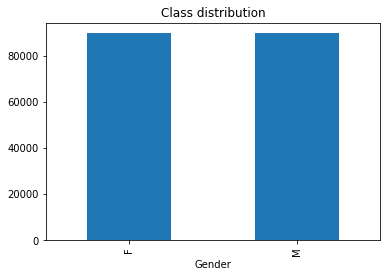

In [14]:
dataset.pivot_table(index='Gender', aggfunc='size').plot(kind='bar', title = 'Class distribution')


# TREINAMENTO TF-IDF


**TREINAMENTO COM OS NOMES SENDO AS FEATURES E OS ROTULOS SÃO HOMEM/MULHER**

In [15]:
dataset_binario = dataset

dataset_binario.Gender.replace({'F':0,'M':1},inplace=True)

dataset_binario.Gender.unique()


array([1, 0])

In [16]:
Xfeatures = dataset_binario['Name']
convertor = TfidfVectorizer()
#Features
X = convertor.fit_transform(Xfeatures)
convertor.get_feature_names()
#Rotulos
y = dataset_binario.Gender


In [17]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y)

classifier = MultinomialNB()
classifier.fit(X_treino,y_treino)
classifier.score(X_teste,y_teste)


0.5030194986072424

In [18]:
final_results = classifier.predict(X_teste)
print(final_results)

[1 1 1 ... 1 1 1]


In [19]:
print("Accuracy of Model",classifier.score(X_teste,y_teste)*100,"%")

Accuracy of Model 50.301949860724235 %


In [20]:
print("Accuracy of Model",classifier.score(X_treino,y_treino)*100,"%")


Accuracy of Model 94.40585932567244 %


In [21]:
print(y_teste)
print(final_results)

121008    0
178975    0
58559     1
145700    0
1370      1
         ..
72889     1
125933    0
31189     1
120025    0
117323    0
Name: Gender, Length: 44875, dtype: int64
[1 1 1 ... 1 1 1]


In [22]:
print("F1: ", f1_score(y_teste, final_results))

F1:  0.6517380305443643


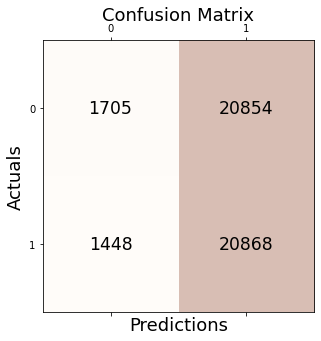

In [23]:
conf_matrix = confusion_matrix(y_true=y_teste, y_pred=final_results)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# TREINAMENTO COM EXTRAÇÕES DE LETRAS 

In [18]:
def feature_sufixo(x):
    return {'sufixo1': x[-1:],
            'sufixo2': x[-2:],
            }
feature_sufixo('Josephine')

{'sufixo1': 'e', 'sufixo2': 'ne'}

In [24]:
def feature_prefixosufixo(x):
    return {'sufixo1': x[-1:],
            'sufixo2': x[-2:],
            'prefixo': x[:2],
            }
feature_prefixosufixo('Josephine')

{'prefixo': 'Jo', 'sufixo1': 'e', 'sufixo2': 'ne'}

In [20]:
def feature_prefixo(x):
    return {
            'prefixo': x[0],
            'prefixo2': x[:2],
            }
feature_prefixo('Josephine')

{'prefixo': 'J', 'prefixo2': 'Jo'}

In [25]:
final_dataset = dataset.iloc[:,[0,1]]


In [26]:
dataset_features = final_dataset

print(dataset_features)

             Name  Gender
0            Isau       1
1           Ronen       1
2       Enemencio       1
3           Dysan       1
4        Kennieth       1
...           ...     ...
179493      Zyika       0
179494   Zymeliah       0
179495     Zyrije       0
179496    Zyrinah       0
179497       Zyta       0

[179498 rows x 2 columns]


In [27]:
M_data2 = dataset_features[dataset_features.Gender == 1]
F_data2 = dataset_features[dataset_features.Gender == 0]


M_nomes2 = M_data2[M_data2.columns[0]].tolist()
F_nomes2 = F_data2[F_data2.columns[0]].tolist()


In [36]:
#Treinamento com as features sendo PREFIXO (rodar somente 1 dos blocos)


nomes_rotulados = ([(Name, 1) for Name in M_nomes2] + [(Name, 0) for Name in F_nomes2])
print(nomes_rotulados)
#random.shuffle(nomes_rotulados)

set_features = [(feature_prefixo(n), Gender) for (n, Gender) in nomes_rotulados]
set_treino, set_teste = set_features[50000:], set_features[:50000]
classifier = nltk.NaiveBayesClassifier.train(set_treino)


[('James', 1), ('John', 1), ('Robert', 1), ('Michael', 1), ('William', 1), ('David', 1), ('Joseph', 1), ('Richard', 1), ('Charles', 1), ('Thomas', 1), ('Christopher', 1), ('Daniel', 1), ('Matthew', 1), ('Anthony', 1), ('George', 1), ('Donald', 1), ('Paul', 1), ('Mark', 1), ('Andrew', 1), ('Steven', 1), ('Kenneth', 1), ('Edward', 1), ('Joshua', 1), ('Brian', 1), ('Kevin', 1), ('Timothy', 1), ('Jason', 1), ('Ronald', 1), ('Ryan', 1), ('Jeffrey', 1), ('Jacob', 1), ('Nicholas', 1), ('Eric', 1), ('Frank', 1), ('Gary', 1), ('Stephen', 1), ('Jonathan', 1), ('Justin', 1), ('Brandon', 1), ('Larry', 1), ('Scott', 1), ('Benjamin', 1), ('Raymond', 1), ('Samuel', 1), ('Gregory', 1), ('Alexander', 1), ('Patrick', 1), ('Jack', 1), ('Henry', 1), ('Dennis', 1), ('Walter', 1), ('Tyler', 1), ('Peter', 1), ('Aaron', 1), ('Jerry', 1), ('Adam', 1), ('Nathan', 1), ('Douglas', 1), ('Jose', 1), ('Zachary', 1), ('Harold', 1), ('Arthur', 1), ('Kyle', 1), ('Carl', 1), ('Albert', 1), ('Jeremy', 1), ('Lawrence', 1)

In [28]:
#Treinamento com as features sendo PREFIXO+SUFIXO

nomes_rotulados = ([(Name, 1) for Name in M_nomes2] + [(Name, 0) for Name in F_nomes2])
print(nomes_rotulados)
#random.shuffle(nomes_rotulados)

set_features = [(feature_prefixosufixo(n), Gender) for (n, Gender) in nomes_rotulados]
set_treino, set_teste = set_features[50000:], set_features[:50000]
classifier = nltk.NaiveBayesClassifier.train(set_treino)

[('Isau', 1), ('Ronen', 1), ('Enemencio', 1), ('Dysan', 1), ('Kennieth', 1), ('Koltyn', 1), ('Rokeem', 1), ('Abdi-Jabaar', 1), ('Joso', 1), ('Hillman', 1), ('Chaytan', 1), ('Bobbie', 1), ('Jakolbe', 1), ('Joshula', 1), ('Rishab', 1), ('Adekunle', 1), ('Rewi', 1), ('Ibrohim', 1), ('Vinod', 1), ('Leondra', 1), ('Jaikin', 1), ('Mavraedes', 1), ('Frankel', 1), ('Gaberiel', 1), ('Romyn', 1), ('Avijot', 1), ('Prasna', 1), ('Kor', 1), ('Detlef-Klaus', 1), ('Gion', 1), ('Migual', 1), ('Ayrian', 1), ('Roony', 1), ('Julez', 1), ('Nikeel', 1), ('Billal', 1), ('Tabitha', 1), ('Deiontre', 1), ('Enrique', 1), ('Haoyang', 1), ('Givon', 1), ('Jamarrie', 1), ('Ryanpaul', 1), ('Adolpho', 1), ('Satbir', 1), ('Antoneyo', 1), ('Nazeer', 1), ('Ruaridh', 1), ('Bahart', 1), ('Rojun', 1), ('Ruble', 1), ('Niklaus', 1), ('Chotelal', 1), ('Ptuska', 1), ('Traeden', 1), ('Leonald', 1), ('Giordion', 1), ('Nau', 1), ('Calob', 1), ('Zamir', 1), ('Paeton', 1), ('Fredricks', 1), ('Cris', 1), ('Vannsothana', 1), ('Gobel'

In [ ]:
#Treinamento com as features sendo SUFIXO


nomes_rotulados = ([(Name, 1) for Name in M_nomes2] + [(Name, 0) for Name in F_nomes2])
print(nomes_rotulados)
#random.shuffle(nomes_rotulados)

set_features = [(feature_sufixo(n), Gender) for (n, Gender) in nomes_rotulados]
set_treino, set_teste = set_features[50000:], set_features[:50000]
classifier = nltk.NaiveBayesClassifier.train(set_treino)

[('Tymetrius', 1), ('Daequan', 1), ('Vatroslav', 1), ('Chenda', 1), ('Nuno', 1), ('Luck', 1), ('Marcusanthony', 1), ('Denzelle', 1), ('Musaab', 1), ('Tho', 1), ('Tharnsis', 1), ('Clemont', 1), ('Ahaziah', 1), ('Thessalonia', 1), ('Rainey', 1), ('Adien', 1), ('Jeffary', 1), ('Onaje', 1), ('Rashimoriq', 1), ('Stephens', 1), ('Hawa', 1), ('Harrel', 1), ('Arzo', 1), ('Makin', 1), ('Avelino', 1), ('Roane', 1), ('Wykeham', 1), ('Zakton', 1), ('Igbal', 1), ('Parke', 1), ('Leyhton', 1), ('Tohrm', 1), ('Tahja', 1), ('Madhava', 1), ('Jahagir', 1), ('Arestidi', 1), ('Kaihain', 1), ('Iean', 1), ('Od', 1), ('Tochukwu', 1), ('Dron', 1), ('Dashel', 1), ('Jazzlee', 1), ('Souren', 1), ('Dillin', 1), ('Zemar', 1), ('Acen', 1), ('Anrthony', 1), ('Draylan', 1), ('Hawon', 1), ('Navi', 1), ('Aleksandr', 1), ('Atlai', 1), ('Sahaan', 1), ('Haskel', 1), ('Daemon', 1), ('Braxstyn', 1), ('Anthony-Dimosthenis', 1), ('Rafay', 1), ('Stiney', 1), ('Traianos', 1), ('Odhinn', 1), ('Bentjiman', 1), ('Cordarius', 1), ('

In [29]:
print(nltk.classify.accuracy(classifier, set_teste))

0.69532


In [ ]:
classifier.show_most_informative_features(15)


Most Informative Features
                 sufixo2 = 'ob'                1 : 0      =     34.4 : 1.0
                 sufixo2 = 'os'                1 : 0      =     31.6 : 1.0
                 sufixo2 = 'yk'                1 : 0      =     22.9 : 1.0
                 sufixo2 = 'jr'                1 : 0      =     20.2 : 1.0
                 sufixo2 = 'pp'                1 : 0      =     18.7 : 1.0
                 sufixo2 = 'eq'                1 : 0      =     18.7 : 1.0
                 sufixo2 = 'nk'                1 : 0      =     18.7 : 1.0
                 sufixo2 = 'io'                1 : 0      =     18.3 : 1.0
                 sufixo2 = 'ck'                1 : 0      =     17.3 : 1.0
                 sufixo2 = 'bb'                1 : 0      =     17.2 : 1.0
                 sufixo2 = 'ik'                1 : 0      =     16.3 : 1.0
                 sufixo2 = 'av'                1 : 0      =     15.9 : 1.0
                 sufixo2 = 'ib'                1 : 0      =     15.3 : 1.0

In [ ]:
#Treinamento com as features sendo PREFIXO (rodar somente 1 dos blocos)

vetor = []
for (name, tag) in nomes_rotulados:
  guess = classifier.classify(feature_prefixo(name))
  vetor.append(guess)
print(vetor)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
#Treinamento com as features sendo PREFIXO+SUFIXO

vetor = []
for (name, tag) in nomes_rotulados:
  guess = classifier.classify(feature_prefixosufixo(name))
  vetor.append(guess)
print(vetor)

In [ ]:
#Treinamento com as features sendo SUFIXO

vetor = []
for (name, tag) in nomes_rotulados:
  guess = classifier.classify(feature_sufixo(name))
  vetor.append(guess)
print(vetor)

In [ ]:
enumerate(vetor)
for i, item in enumerate(vetor):
    if item == 'F':
        vetor[i] = 0
    elif item == 'M':
        vetor[i] = 1

print(vetor)

In [ ]:
lista_generos = [Gender for (n, Gender) in nomes_rotulados]
print(lista_generos)

enumerate(lista_generos)
for i, item in enumerate(lista_generos):
    if item == 'F':
        lista_generos[i] = 0
    elif item == 'M':
        lista_generos[i] = 1

print(lista_generos)

In [ ]:
print("F1: ", f1_score(lista_generos, vetor))

In [ ]:
conf_matrix = confusion_matrix(y_true=lista_generos, y_pred=vetor)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()